<a href="https://colab.research.google.com/github/alaazagha/Prediction-of-Product-Sales/blob/main/Alaa_Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

 - Author: Alaa Zagha

## Project Overview
Sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

## Loading Data

In [172]:
#importing libraries to use during the project
import pandas as pd
import numpy as np


In [173]:
#mounting google drive to load data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
#loading Dataset
f_sales = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/sales_predictions_2023.csv"
df_sales = pd.read_csv(f_sales)


Initial Inspection of dataset

In [226]:
#to see how the dataset looklike displaying first 5 rows
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


checking the size and data type of the dataset

In [227]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


So the initial inspection shows:
  - The dataset has 12 cols.(features)
  - The dataset has 8523 rows
  - 5 (41.7%) of the features are numerical data and 7(48.3%) are categorial


so after reading the features Outlet Establishment year is int, it makes sense to make it string(object) for data analysis later on

In [228]:
#changeing year type to object
df_sales['Outlet_Establishment_Year'].astype(object)

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: object

changing Item_identifier name to Item_id and outlet_identifier to outlet_id

In [229]:
rename_dict = {"Item_Identifier":"item_id",
             "Outlet_Identifier": "outlet_id"}
df_sales = df_sales.rename(rename_dict, axis = 1)

checking the dataset for duplicates

In [45]:
dups_sum = df_sales.duplicated().sum()
dups_sum

0

There are no duplicated data

lets check for missing values

In [230]:
null_sum = df_sales.isna().sum()
null_sum

item_id                         0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
outlet_id                       0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we have 1463 numerical missing value and 2410 missng categorial

lets save each missing value in a different variable so we can clean them in the next steps

In [231]:
#storing the categorial data in cat_cols
cat_cols = df_sales.select_dtypes('object').columns
cat_cols

Index(['item_id', 'Item_Fat_Content', 'Item_Type', 'outlet_id', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [232]:
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## Clean Data

 Address the missing values by using a placeholder value, for a categorial we're going to use missing, for numerical the mean of the same product id because we have the missing numerical values in weight

In [233]:
#replacing missing categorial value with missing
df_sales[cat_cols] = df_sales[cat_cols].fillna("MISSING")
df_sales[cat_cols].isna().sum()

item_id                 0
Item_Fat_Content        0
Item_Type               0
outlet_id               0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

as for the weight we need to replace the null value with the weight of each product item

In [258]:
#first we need to check how many product ids there are
item_Weight_dups = df_sales.duplicated(subset = ['Item_Weight'], keep=False)
item_Weight_dups.sum()

8521

we have 8523 row and there's 8514 duplicates of the item identifier which means there's only 9 product Id

In [261]:
df_sales[item_Weight_dups].sort_values('Item_Type')

,item_id,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,outlet_id,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3474,FDS12,9.10,Low Fat,0.304859,Baking Goods,125.4362,OUT019,1985,Small,Tier 1,Grocery Store,755.0172
7783,FDA23,9.80,Low Fat,0.046959,Baking Goods,101.3016,OUT027,1985,Medium,Tier 3,Supermarket Type3,2327.6368
5392,FDU12,15.50,Regular,0.132630,Baking Goods,263.8568,OUT019,1985,Small,Tier 1,Grocery Store,790.9704
5387,FDS60,20.85,Low Fat,0.032581,Baking Goods,180.0660,OUT018,2009,Medium,Tier 3,Supermarket Type2,2157.1920
8133,FDZ60,20.50,Low Fat,0.119848,Baking Goods,109.4596,OUT018,2009,Medium,Tier 3,Supermarket Type2,431.4384
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,FDA34,11.50,Low Fat,0.014921,Starchy Foods,173.9080,OUT018,2009,Medium,Tier 3,Supermarket Type2,1211.7560
2359,FDF47,20.85,Low Fat,0.097618,Starchy Foods,223.9746,OUT046,1997,Small,Tier 1,Supermarket Type1,897.4984
5445,FDH47,13.50,Regular,0.215612,Starchy Foods,98.6068,OUT010,1998,MISSING,Tier 3,Grocery Store,97.2068
8360,FDA34,11.50,Low Fat,0.014884,Starchy Foods,174.5080,OUT049,1999,Medium,Tier 1,Supermarket Type1,3635.2680


here we noticed that there are a lot of item id duplicates and each item id has the same weight so the best way to solve the missing value is to replace it with the weight of its' produdt weight

In [246]:
id_weight = df_sales.groupby('item_id')['Item_Weight'].value_counts()
id_weight
#weight_na = df_sales['Item_Weight'].isna()
#weight_na


item_id  Item_Weight
DRA12    11.600         6
DRA24    19.350         7
DRA59    8.270          8
DRB01    7.390          3
DRB13    6.115          5
                       ..
NCZ30    6.590          7
NCZ41    19.850         5
NCZ42    10.500         5
NCZ53    9.600          5
NCZ54    14.650         7
Name: count, Length: 1555, dtype: int64

In [243]:
import numpy as np
# get the index of the missing values in df_sales['Item_Weight']
index_nan = df_sales['Item_Weight'].index[np.isnan(df_sales['Item_Weight'])]
# replace the missing value  by the values of Item_weight in df_sales that has the same id_item value in df_sales
for i in index_nan:
  id_item = df_sales.loc[i]['item_id']
  df_sales.loc[i, 'Item_Weight'] = df_sales[df_sales['item_id'] == id_item]['Item_Weight'].values[0]


In [52]:
df_sales['item_id'].value_counts()

item_id
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [244]:
df_sales['Item_Weight'].value_counts()

Item_Weight
12.150    104
17.600    102
13.650     89
11.800     88
15.100     86
         ... 
6.405       2
6.325       2
8.800       2
9.420       1
5.400       1
Name: count, Length: 415, dtype: int64

In [111]:
df_na = df_sales['Item_Weight'].isna()

In [250]:
df_na

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [262]:
df_sales[num_cols] = df_sales[num_cols].fillna(df_sales['Item_Weight'].mean())


In [263]:
df_sales[num_cols].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

all missing values are dealt with

Finding inconsistent categories of data

In [54]:
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for item_id
item_id
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value Counts for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


Value Counts for outlet_id
outlet_id
OUT027    935
OUT013    932
OUT049    930
OUT046    

we found that the data in item_fat_content is incosistent there's 3 ways to describe low fat, lets agree on Low Fat to be the consistent value. Also there's two ways to describe regular lets agree on Regular

In [254]:
#first we're replacing LF and low fat by Low Fat
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    2889
reg         117
Name: count, dtype: int64

so Low Fat was  5089 now 5517

In [255]:
#then we're replacing reg  by Regular
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'reg':"Regular"})
df_sales['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [57]:
for col in num_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Weight
Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64


Value Counts for Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64


Value Counts for Item_MRP
Item_MRP
172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: count, Length: 5938, dtype: int64


Value Counts for Outlet_Establishment_Year
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64


Value Counts for Item_Outlet_Sales
Item_Outlet_Sales
958.7520  

we noticed that Regular now is 3006 and it was 2889,so now we fixed all incosistent data

In [264]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.889741,0.066132,140.992782,1997.831867,2181.288914
std,4.599292,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.895000,0.026989,93.826500,1987.000000,834.247400
50%,12.850000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [266]:
#importing plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Average MRP vs Store and fat content

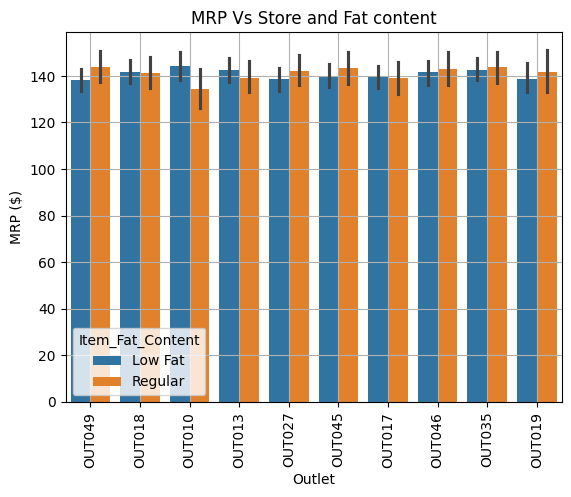

In [329]:
ax = sns.barplot(data =df_sales, x = 'outlet_id', y = 'Item_MRP', hue = 'Item_Fat_Content')
ax.set_ylabel('MRP ($)')
ax.set_xlabel('Outlet')
ax.set_title('MRP Vs Store and Fat content')
ax.tick_params(axis='x', rotation=90)
ax.grid();

Mostly the regulat products has more MRP than Low Fat products except at OUT10 the Low Fat has higher MRP

# Heatmap of Correlation to understand the relations between the features

In [288]:
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.03,-0.02,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.03,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.02,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


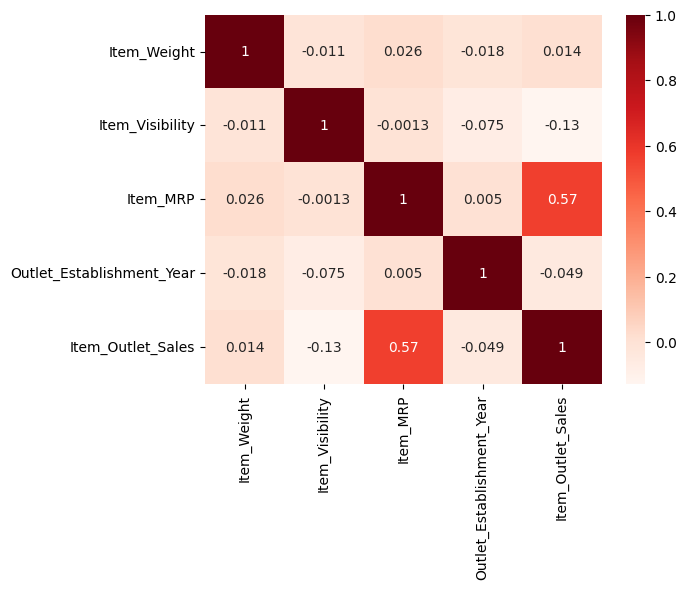

In [290]:
sns.heatmap(corr,cmap = "Reds",annot = True);

there's a good positive correlation between Item_MRP and Outlet_sales, the higher the price of product higher sales

# sales vs store

In [291]:
outlet_sales = df_sales.groupby('outlet_id')['Item_Outlet_Sales'].mean()
outlet_sales

outlet_id
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

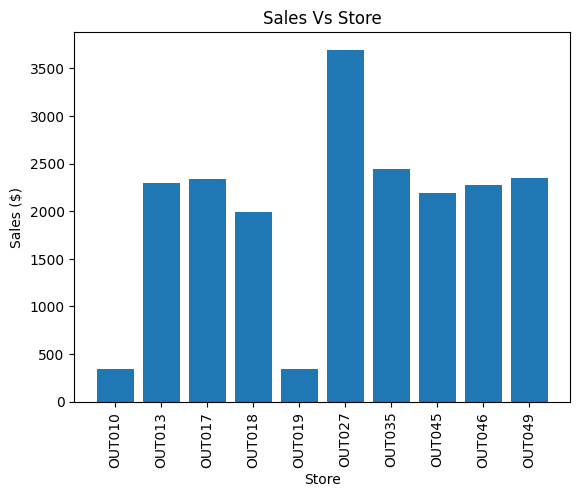

In [301]:
fig, ax = plt.subplots()
ax.bar(outlet_sales.index,outlet_sales.values)
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Store')
ax.set_title('Sales Vs Store')
ax.tick_params(axis='x', rotation=90);

the store OUT27 has the highest average of sales

# Sales Vs Store and Fat Content

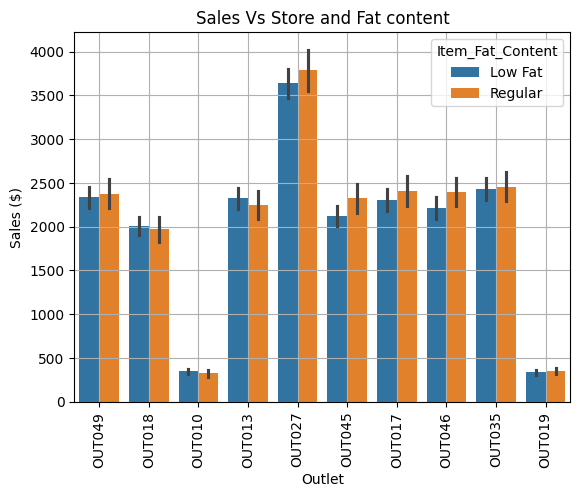

In [303]:
ax = sns.barplot(data = df_sales, x = 'outlet_id', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Outlet')
ax.set_title('Sales Vs Store and Fat content')
ax.tick_params(axis='x', rotation=90)
ax.grid();

We notice that the regular fat products has more sales than Low fat products

# Sales Vs Store and Store Type

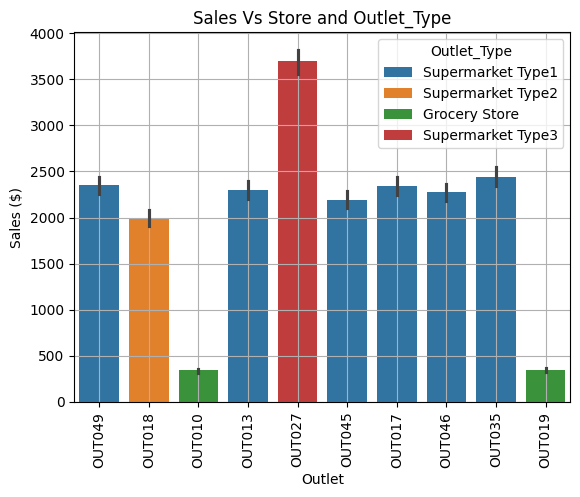

In [304]:
ax = sns.barplot(data = df_sales, x = 'outlet_id', y = 'Item_Outlet_Sales', hue = 'Outlet_Type')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Outlet')
ax.set_title('Sales Vs Store and Outlet_Type')
ax.tick_params(axis='x', rotation=90)
ax.grid();

We find out that groceries stores has the least sales and the supermarket type3 has the maximum sales, which means the bigger the facility bigger sales

# Sales Vs Store and Product Type

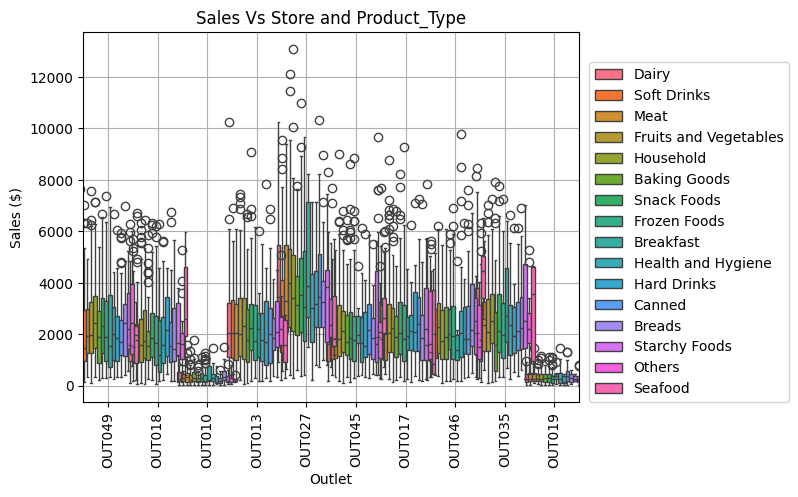

In [324]:
ax = sns.boxplot(data = df_sales, x = 'outlet_id', y = 'Item_Outlet_Sales', hue = 'Item_Type', width = 1.2, saturation = 1.5)
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Outlet')
ax.set_title('Sales Vs Store and Product_Type')
ax.tick_params(axis='x', rotation=90)
ax.legend(loc =(1.02,0))
ax.grid();

Breakfast product has the most sales in the biggest store

# Sales Vs Product Type

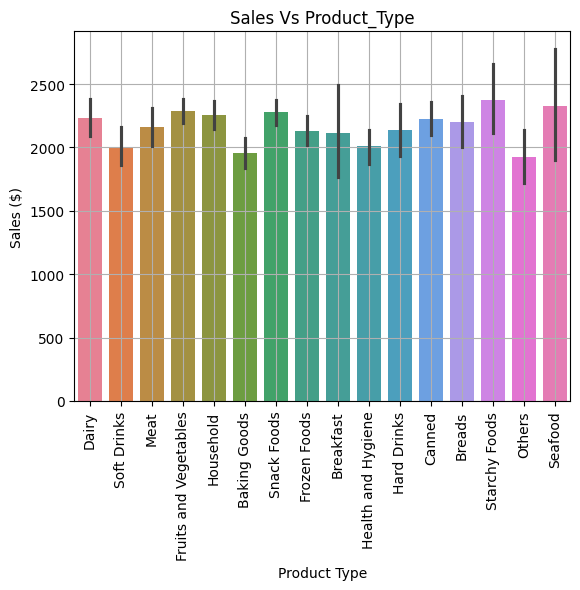

In [319]:
ax = sns.barplot(data = df_sales, x = 'Item_Type', y = 'Item_Outlet_Sales', hue = 'Item_Type')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Product Type')
ax.set_title('Sales Vs Product_Type')
ax.tick_params(axis='x', rotation=90)
ax.grid();

in general starchy foods are the biggest seller

# Sales vs Establishment Year

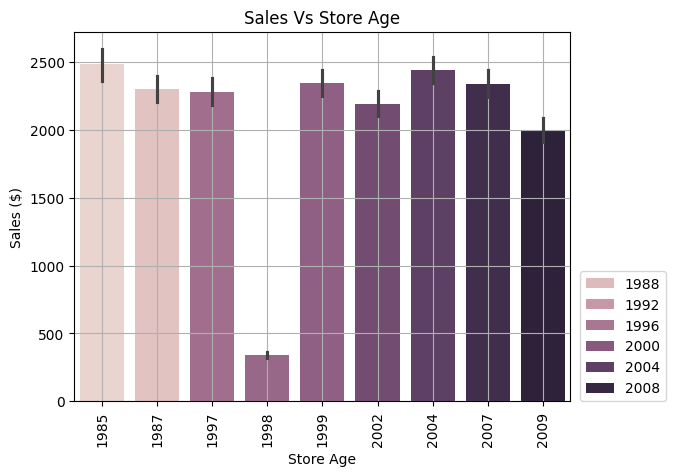

In [333]:
ax = sns.barplot(data = df_sales, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', hue = 'Outlet_Establishment_Year')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Store Age')
ax.set_title('Sales Vs Store Age')
ax.tick_params(axis='x', rotation=90)
ax.legend(loc =(1.02,0))
ax.grid();

The older the Storage, it will have higher sales

## Feature Inspection